In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/SBI_Life_insurance.csv")
df=pd.DataFrame(data=df)
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [9]:
df["sex"].value_counts()
#1 is male
#0 is female

1    676
0    662
Name: sex, dtype: int64

In [10]:
# df["bmi"].value_counts()
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
df["smoker"].value_counts()
# o is non smoker
# 1 is smoker

0    1064
1     274
Name: smoker, dtype: int64

In [12]:
df["region"].value_counts()
# region: the residential area of policyholder in the US (northeast=0,northwest=1, southeast=2, southwest=3)

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [13]:
df["insuranceclaim"].value_counts()
# insuranceclaim: yes=1, no=0

1    783
0    555
Name: insuranceclaim, dtype: int64

## EDA

In [14]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

Text(0.5, 1.0, 'sex count')

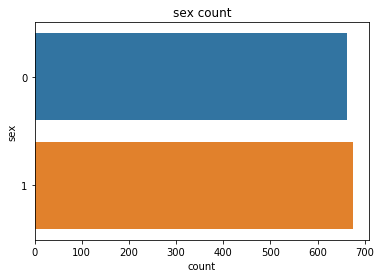

In [16]:
sns.countplot(data=df,y="sex")
plt.title("sex count")

Text(0.5, 1, 'age of the customers')

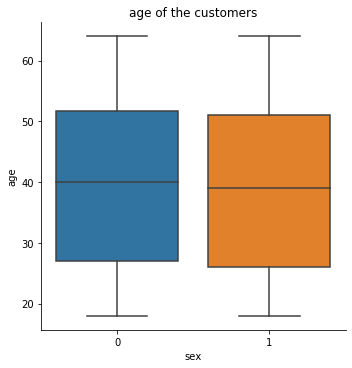

In [17]:
sns.catplot(data=df,x="sex",y="age",kind="box")
plt.title("age of the customers")

#the mean age in male and female both are around 40 where 1 is male 

Text(0.5, 1.0, 'smokers count')

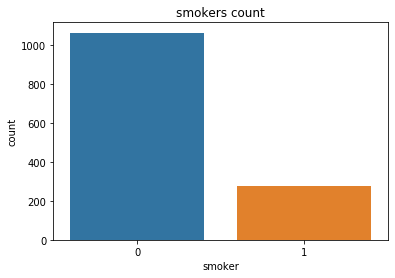

In [18]:
sns.countplot(x="smoker",data=df)
plt.title("smokers count")
#very less non smokers are present compared to the smokers

Text(0.5, 1.0, 'number of children parents have')

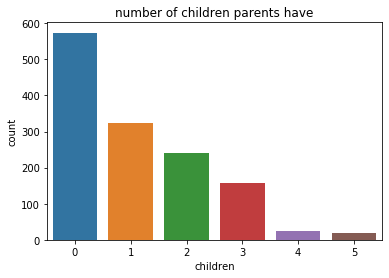

In [19]:
sns.countplot(x="children",data=df)
plt.title("number of children parents have")

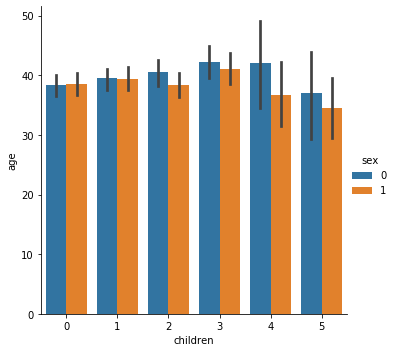

In [20]:
sns.catplot(data=df,x="children",y="age",kind="bar",hue="sex")

Text(0.5, 1.0, 'age and charges')

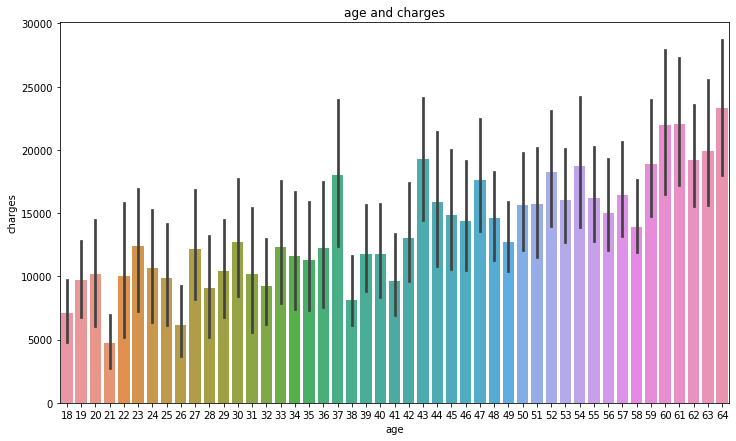

In [21]:
plt.figure(figsize=(12,7))
sns.barplot(x="age",y="charges",data=df)
plt.title("age and charges")

#higher the age higher is the insurance charges

Text(0.5, 1.0, "customer's regions")

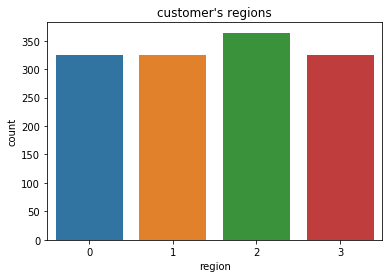

In [22]:
sns.countplot(x="region",data=df)
plt.title("customer's regions")

Text(0.5, 1.0, 'region vs charges')

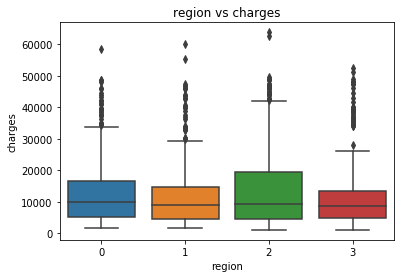

In [23]:
#we will check if the region effects the insurance charges
sns.boxplot(x="region",y="charges",data=df)
plt.title("region vs charges")

#we can see that the region does not effect the insurance charges of the cusotmers hence it will be dropped

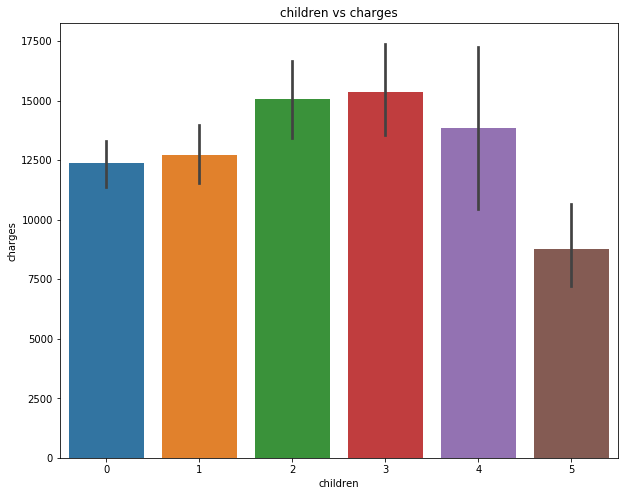

In [31]:
#higher the children higher are the insurance charges. lets visualise it
plt.figure(figsize=(10,8))
plt.title("children vs charges")

sns.barplot(x="children",y="charges",data=df)
#here we can see that the the parents with 5 children have to pay less than other parents. usually parents with hihger number 
# children have to pay more charges.

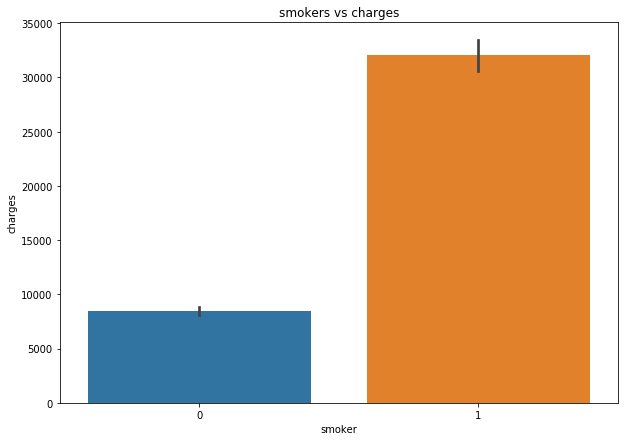

In [34]:
plt.figure(figsize=(10,7))
plt.title("smokers vs charges")
sns.barplot(x="smoker",y="charges",data=df)

#from the graph we can see that the people who smoke have more isnurance costs than people who dont smoke

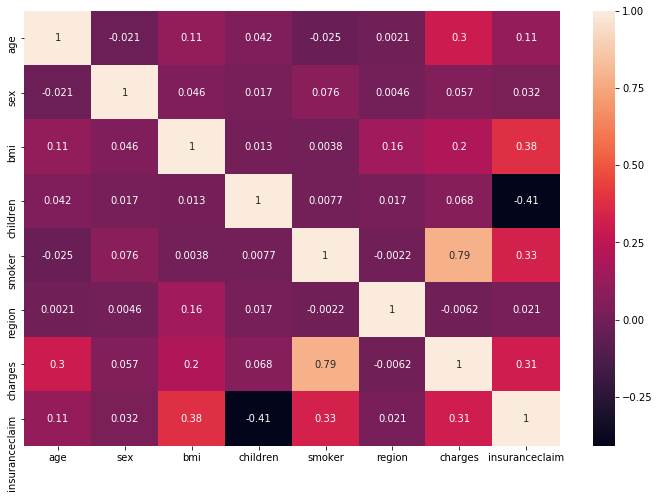

In [125]:
plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr,annot=True)
#checking out the correletion of the features using a heatmap

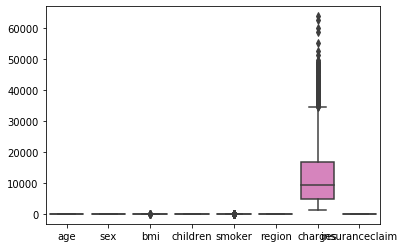

In [25]:
sns.boxplot(data=df)

In [45]:
#now lets remove the unnecessary the columns i.e region from the dataframe

data=df.drop("region",axis=1)
data.shape

(1338, 7)

# Train test split

In [46]:
data.head()

,age,sex,bmi,children,smoker,charges,insuranceclaim
0,19,0,27.900,0,1,16884.92400,1
1,18,1,33.770,1,0,1725.55230,1
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,0
4,32,1,28.880,0,0,3866.85520,1


In [48]:
x=df.iloc[:,:-2]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [52]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [83]:
# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [88]:
#here in i will apply all the basic classification algorithm in a for loop to select which algorithm performs the best

max_acc_score=0
count=range(101)
model=[LogisticRegression(),MultinomialNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    for i in count:
        train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.3,random_state=i)        
        m.fit(train_x,train_y)
        m.score(train_x,train_y)
        pred=m.predict(test_x)

        acc_score=accuracy_score(test_y,pred)
        print("accuracy score corresponding to the random state", i ,"is" , acc_score)
        
        if acc_score>max_acc_score:
            max_acc_score = acc_score
            final_i = i
    print("Model used  ;", m)
    print("\n")
print("\n")
print("max acc_score corresponding to the random state ",final_i,"is", max_acc_score)
print("confusion matrix corresponding to the random state", final_i ,"is" , confusion_matrix(test_y,pred))
print("\n")
print("classification report corresponding to the random state", final_i ,"is" , classification_report(test_y,pred))
print("\n")

accuracy score corresponding to the random state 0 is 0.8631840796019901
accuracy score corresponding to the random state 1 is 0.8805970149253731
accuracy score corresponding to the random state 2 is 0.8830845771144279
accuracy score corresponding to the random state 3 is 0.8656716417910447
accuracy score corresponding to the random state 4 is 0.9029850746268657
accuracy score corresponding to the random state 5 is 0.8756218905472637
accuracy score corresponding to the random state 6 is 0.900497512437811
accuracy score corresponding to the random state 7 is 0.8631840796019901
accuracy score corresponding to the random state 8 is 0.8830845771144279
accuracy score corresponding to the random state 9 is 0.8656716417910447
accuracy score corresponding to the random state 10 is 0.8606965174129353
accuracy score corresponding to the random state 11 is 0.8731343283582089
accuracy score corresponding to the random state 12 is 0.8706467661691543
accuracy score corresponding to the random state 

accuracy score corresponding to the random state 21 is 0.7213930348258707
accuracy score corresponding to the random state 22 is 0.7761194029850746
accuracy score corresponding to the random state 23 is 0.7338308457711443
accuracy score corresponding to the random state 24 is 0.7810945273631841
accuracy score corresponding to the random state 25 is 0.7587064676616916
accuracy score corresponding to the random state 26 is 0.7437810945273632
accuracy score corresponding to the random state 27 is 0.8208955223880597
accuracy score corresponding to the random state 28 is 0.7711442786069652
accuracy score corresponding to the random state 29 is 0.7860696517412935
accuracy score corresponding to the random state 30 is 0.7711442786069652
accuracy score corresponding to the random state 31 is 0.7835820895522388
accuracy score corresponding to the random state 32 is 0.7885572139303483
accuracy score corresponding to the random state 33 is 0.7338308457711443
accuracy score corresponding to the ra

accuracy score corresponding to the random state 33 is 0.8308457711442786
accuracy score corresponding to the random state 34 is 0.8582089552238806
accuracy score corresponding to the random state 35 is 0.8059701492537313
accuracy score corresponding to the random state 36 is 0.8134328358208955
accuracy score corresponding to the random state 37 is 0.8407960199004975
accuracy score corresponding to the random state 38 is 0.7960199004975125
accuracy score corresponding to the random state 39 is 0.818407960199005
accuracy score corresponding to the random state 40 is 0.8233830845771144
accuracy score corresponding to the random state 41 is 0.8208955223880597
accuracy score corresponding to the random state 42 is 0.835820895522388
accuracy score corresponding to the random state 43 is 0.8134328358208955
accuracy score corresponding to the random state 44 is 0.8557213930348259
accuracy score corresponding to the random state 45 is 0.8333333333333334
accuracy score corresponding to the rand

accuracy score corresponding to the random state 48 is 0.9825870646766169
accuracy score corresponding to the random state 49 is 0.9527363184079602
accuracy score corresponding to the random state 50 is 0.9900497512437811
accuracy score corresponding to the random state 51 is 0.9427860696517413
accuracy score corresponding to the random state 52 is 0.9875621890547264
accuracy score corresponding to the random state 53 is 0.9800995024875622
accuracy score corresponding to the random state 54 is 0.9875621890547264
accuracy score corresponding to the random state 55 is 0.9751243781094527
accuracy score corresponding to the random state 56 is 0.9701492537313433
accuracy score corresponding to the random state 57 is 1.0
accuracy score corresponding to the random state 58 is 0.9875621890547264
accuracy score corresponding to the random state 59 is 0.9875621890547264
accuracy score corresponding to the random state 60 is 0.9701492537313433
accuracy score corresponding to the random state 61 i

accuracy score corresponding to the random state 55 is 0.9104477611940298
accuracy score corresponding to the random state 56 is 0.9402985074626866
accuracy score corresponding to the random state 57 is 0.9601990049751243
accuracy score corresponding to the random state 58 is 0.9378109452736318
accuracy score corresponding to the random state 59 is 0.9502487562189055
accuracy score corresponding to the random state 60 is 0.945273631840796
accuracy score corresponding to the random state 61 is 0.945273631840796
accuracy score corresponding to the random state 62 is 0.9253731343283582
accuracy score corresponding to the random state 63 is 0.9502487562189055
accuracy score corresponding to the random state 64 is 0.9378109452736318
accuracy score corresponding to the random state 65 is 0.9601990049751243
accuracy score corresponding to the random state 66 is 0.9676616915422885
accuracy score corresponding to the random state 67 is 0.945273631840796
accuracy score corresponding to the rando

In [89]:
pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [95]:
predy=pd.DataFrame(pred)
predy.head()

,0
0,1
1,0
2,1
3,1
4,1


In [94]:
predy[0].value_counts()
#just checking out for the predicted data

1    226
0    176
Name: 0, dtype: int64

In [101]:
test_y.value_counts()
#comparing the values counts with the pred value counts just to see manually how accurate is the model

1    240
0    162
Name: insuranceclaim, dtype: int64

In [121]:
#check for the overfitting and underfitting of the data
dtc=DecisionTreeClassifier()
cross_val_score(dtc,x,y,cv=10,scoring="accuracy").mean()
# we can see that the crossvalscore and our accuracy score is almost the same, so we do not need cross validation

0.9925091750936212

In [122]:
#from the above model selection whe have derived that the decisiontreeclassifier is the best algorithm for our data

dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=.3,random_state=0)        
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred=dtc.predict(test_x)

print("The best accuracy score for the model is ",accuracy_score(test_y,pred))
print(classification_report(test_y,pred))
print(confusion_matrix(test_y,pred))

The best accuracy score for the model is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       222

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402

[[180   0]
 [  0 222]]


# Saving the file

In [127]:
from sklearn.externals import joblib
joblib.dump(dtc,"dtc_EVALPROJECT_2")

['dtc_EVALPROJECT_2']